ARIMA [AutoRegressive Integrated Moving Average]

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  wa

Mean Squared Error: 52.50665643662874


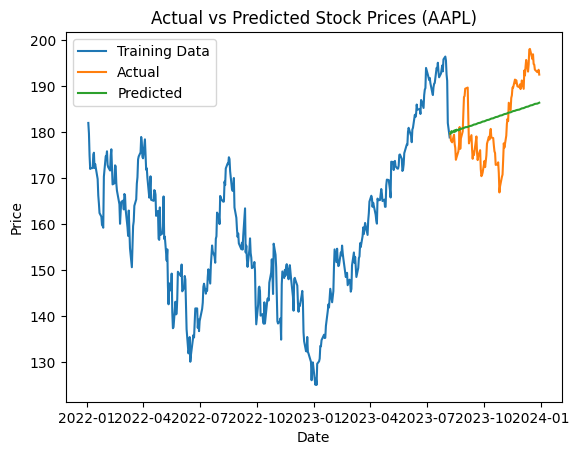

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import yfinance as yf

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = data.index

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].fillna(method='ffill')

#'Close' prices from the fetched data
prices = data.set_index('Date')['Close']

# Split data into train and test
train_size = int(len(prices) * 0.8)
train, test = prices[:train_size], prices[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(4,2,3))
fitted_model = model.fit()

# Predictions
predictions = fitted_model.forecast(steps=len(test))

# Calculate Mean Squared Error
mse = mean_squared_error(test, predictions)
print('Mean Squared Error:', mse)

# Visualize actual vs predicted
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Linear **Regression**

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting para

ARIMA Mean Squared Error: 92.72954939419957
Linear Regression Mean Squared Error: 54.31217614380738


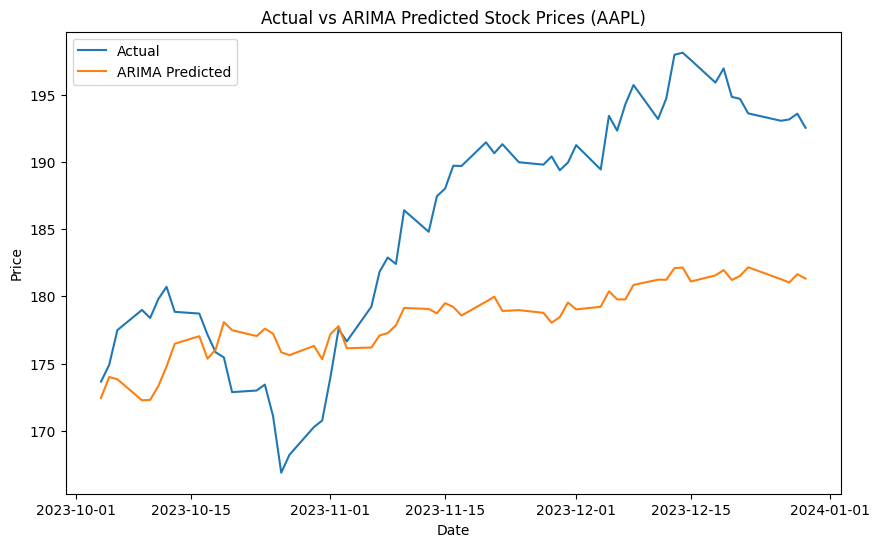

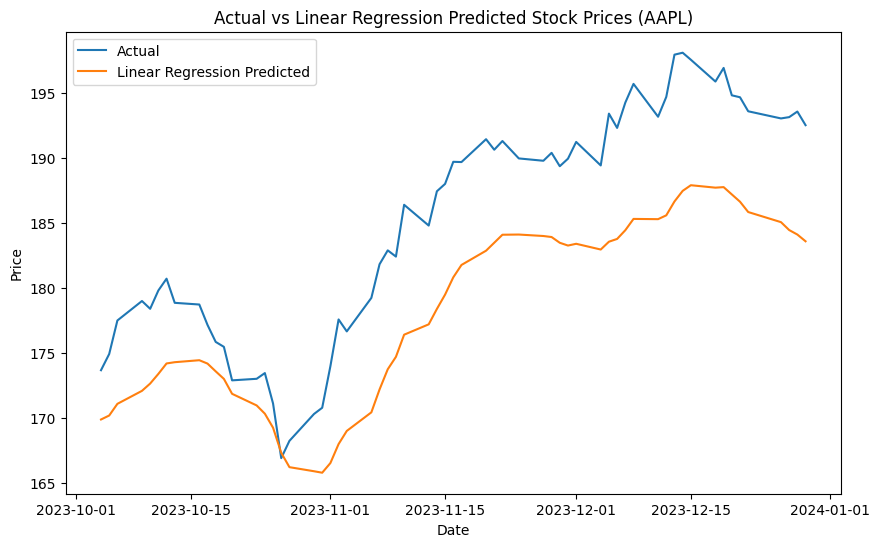

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import yfinance as yf

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = data.index

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].ffill()

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
X = data[['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']]
y = data['Close']

# Split data into train and test sets
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ARIMA Model
arima_model = ARIMA(y_train, order=(28,2,16))
fitted_arima_model = arima_model.fit()
arima_predictions = fitted_arima_model.forecast(steps=len(X_test))

# Linear Regression Model
lr_model = make_pipeline(StandardScaler(), LinearRegression())
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Calculate Mean Squared Error for ARIMA and Linear Regression
arima_mse = mean_squared_error(y_test, arima_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

print('ARIMA Mean Squared Error:', arima_mse)
print('Linear Regression Mean Squared Error:', lr_mse)

# Visualize actual vs predicted for ARIMA
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size:], y_test, label='Actual')
plt.plot(data.index[train_size:], arima_predictions, label='ARIMA Predicted')
plt.title('Actual vs ARIMA Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Visualize actual vs predicted for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size:], y_test, label='Actual')
plt.plot(data.index[train_size:], lr_predictions, label='Linear Regression Predicted')
plt.title('Actual vs Linear Regression Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Decision Tree Regressor

[*********************100%%**********************]  1 of 1 completed


Decision Tree Regressor Mean Squared Error: 23.807786088032252


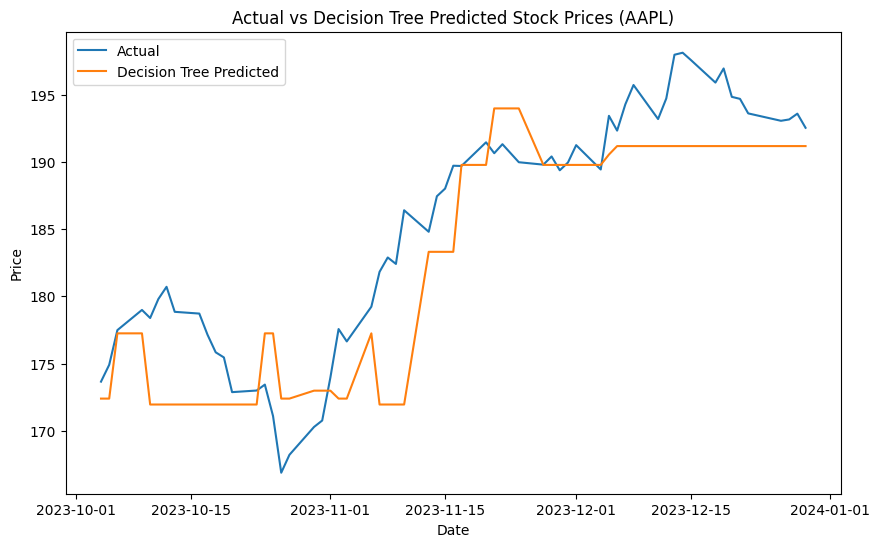

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].ffill()

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']
target = 'Close'
X = data[features]
y = data[target]

# Split data into train and test sets
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_scaled, y_train)
dt_predictions = dt_regressor.predict(X_test_scaled)
dt_mse = mean_squared_error(y_test, dt_predictions)

# Print Mean Squared Error for Decision Tree Regressor
print('Decision Tree Regressor Mean Squared Error:', dt_mse)

# Plotting the graph for Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, dt_predictions, label='Decision Tree Predicted')
plt.title('Actual vs Decision Tree Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Support Vector Regressor

[*********************100%%**********************]  1 of 1 completed


SVR Mean Squared Error: 8.362757158833967


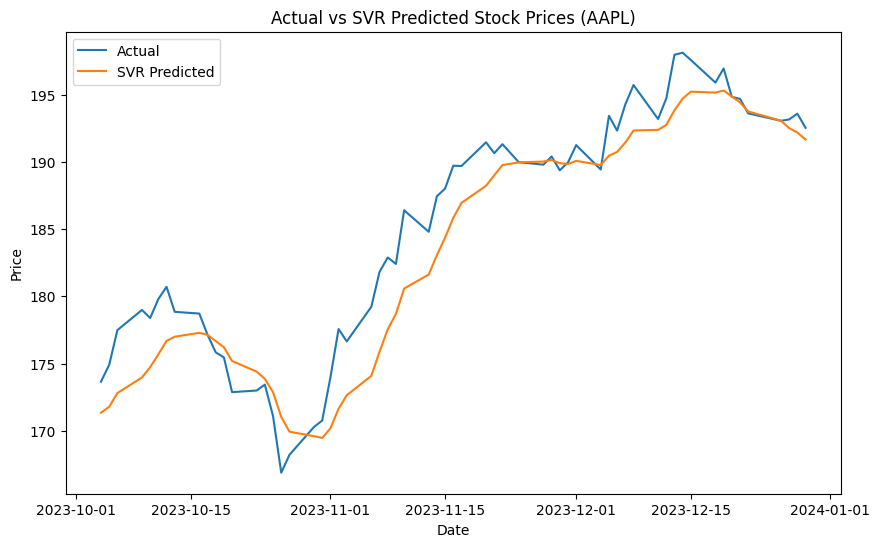

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].ffill()

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']
target = 'Close'
X = data[features]
y = data[target]

# Split data into train and test sets
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regressor
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)
svr_predictions = svr.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_predictions)

# Print Mean Squared Error for SVR
print('SVR Mean Squared Error:', svr_mse)

# Plotting the graph for SVR
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, svr_predictions, label='SVR Predicted')
plt.title('Actual vs SVR Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

KNN [Weighted K-Nearest Neighbour]


[*********************100%%**********************]  1 of 1 completed


Best KNN Parameter - K: 2
KNN Mean Squared Error: 31.713552223309517


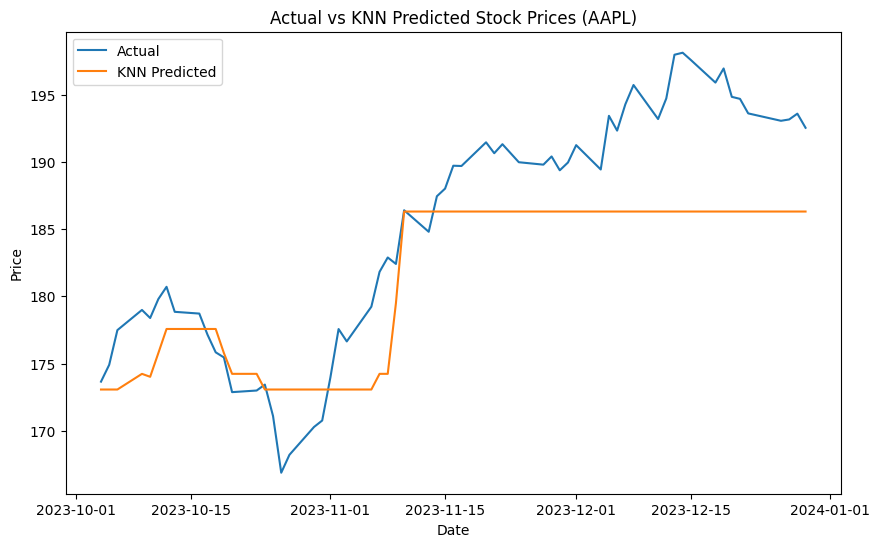

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import yfinance as yf

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].ffill()

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']
target = 'Close'
X = data[features]
y = data[target]

# Split data into train and test sets
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Regressor with Hyperparameter Tuning
best_mse = float('inf')
best_k = None

for k in range(1, 21):  # try different values of k
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_scaled, y_train)
    knn_predictions = knn_regressor.predict(X_test_scaled)
    mse = mean_squared_error(y_test, knn_predictions)
    if mse < best_mse:
        best_mse = mse
        best_k = k

# Train the KNN model with the best hyperparameters
knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
knn_regressor.fit(X_train_scaled, y_train)
knn_predictions = knn_regressor.predict(X_test_scaled)

# Calculate Mean Squared Error for KNN
knn_mse = mean_squared_error(y_test, knn_predictions)
print('Best KNN Parameter - K:', best_k)
print('KNN Mean Squared Error:', knn_mse)

# Visualize actual vs predicted for KNN
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size:], y_test, label='Actual')
plt.plot(data.index[train_size:], knn_predictions, label='KNN Predicted')
plt.title('Actual vs KNN Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Logistic Regression Classification


[*********************100%%**********************]  1 of 1 completed


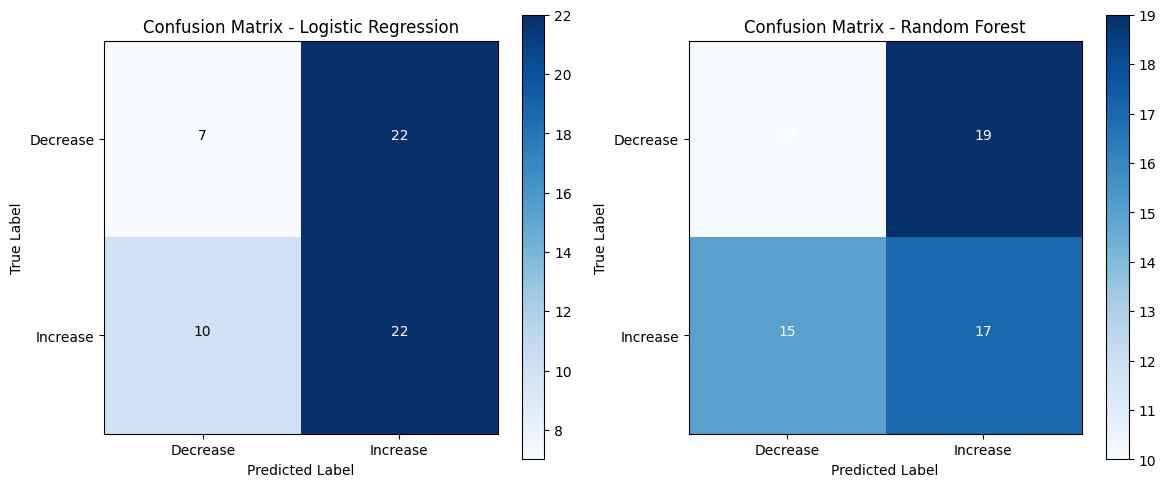

Logistic Regression Accuracy: 0.47540983606557374
Random Forest Accuracy: 0.4426229508196721


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import yfinance as yf

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].ffill()

# Create binary labels: 1 if the price increases compared to the previous day, 0 otherwise
data['Price_Increase'] = (data['Close'] > data['Close'].shift()).astype(int)

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']
target = 'Price_Increase'
X = data[features]
y = data[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_predictions = logistic_reg.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
logistic_cm = confusion_matrix(y_test, logistic_predictions)
plt.imshow(logistic_cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, ['Decrease', 'Increase'])
plt.yticks(tick_marks, ['Decrease', 'Increase'])
for i in range(len(logistic_cm)):
    for j in range(len(logistic_cm[i])):
        plt.text(j, i, format(logistic_cm[i][j], 'd'),
                 horizontalalignment="center",
                 color="white" if logistic_cm[i][j] > logistic_cm.max() / 2. else "black")

# Plot Confusion Matrix for Random Forest Classifier
plt.subplot(1, 2, 2)
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.imshow(rf_cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(tick_marks, ['Decrease', 'Increase'])
plt.yticks(tick_marks, ['Decrease', 'Increase'])
for i in range(len(rf_cm)):
    for j in range(len(rf_cm[i])):
        plt.text(j, i, format(rf_cm[i][j], 'd'),
                 horizontalalignment="center",
                 color="white" if rf_cm[i][j] > rf_cm.max() / 2. else "black")
plt.tight_layout()

plt.show()

# Accuracy comparison
print('Logistic Regression Accuracy:', logistic_accuracy)
print('Random Forest Accuracy:', rf_accuracy)

RFP [Reinforced Forest Regressor Prediction]

[*********************100%%**********************]  1 of 1 completed


Random Forest Mean Squared Error: 13.203495892995978


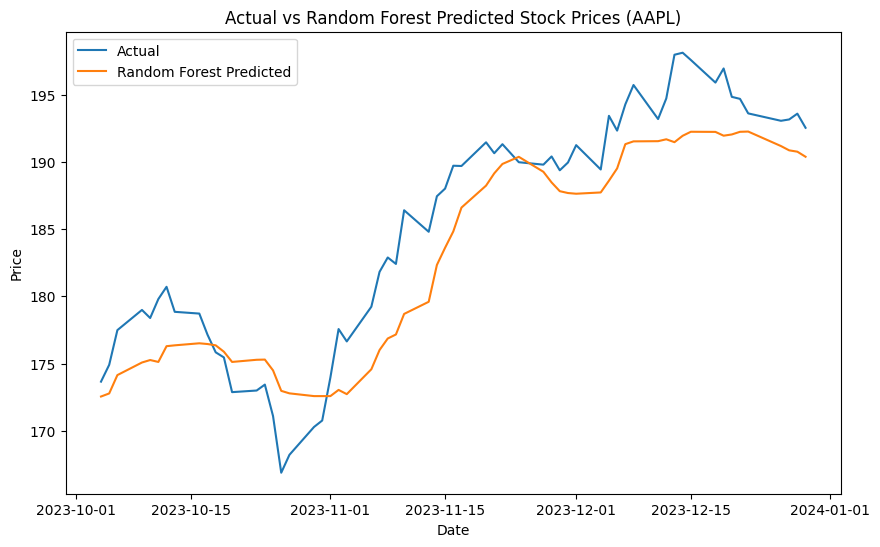

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import yfinance as yf

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].ffill()

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']
target = 'Close'
X = data[features]
y = data[target]

# Split data into train and test sets
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)
rf_predictions = rf_regressor.predict(X_test_scaled)


# Calculate Mean Squared Error for Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)

print('Random Forest Mean Squared Error:', rf_mse)

# Visualize actual vs predicted for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size:], y_test, label='Actual')
plt.plot(data.index[train_size:], rf_predictions, label='Random Forest Predicted')
plt.title('Actual vs Random Forest Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Extreme Gradient Boosting (XGBoost)

[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 6.744033954022299


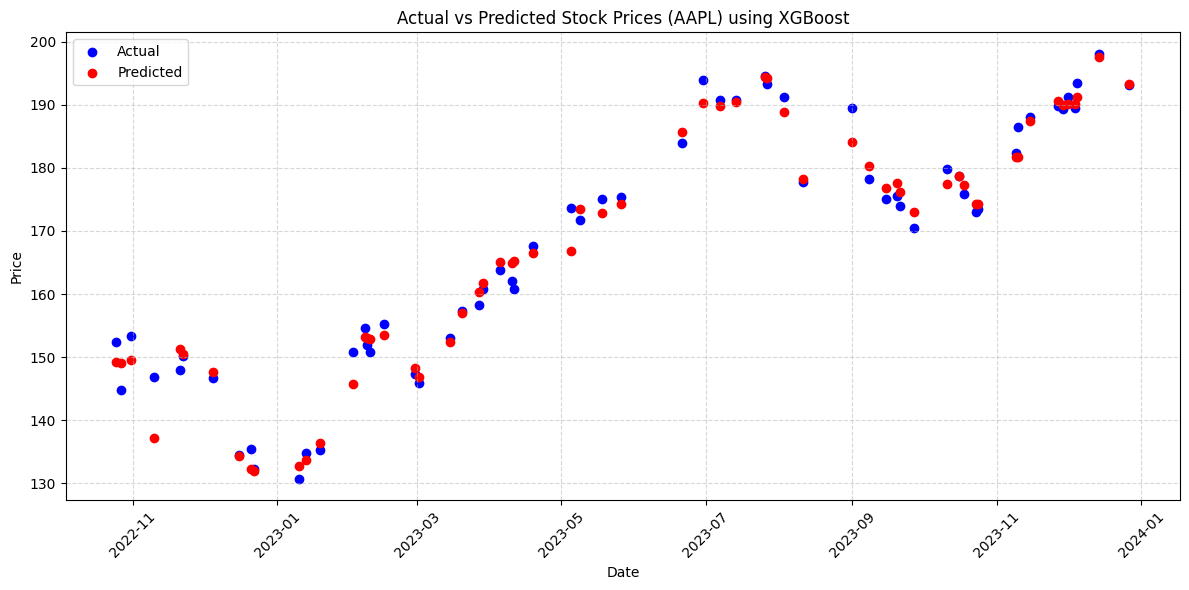

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].ffill()

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']
target = 'Close'
X = data[features]
y = data[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train XGBoost model
model = XGBRegressor(n_estimators=1000, learning_rate=0.01, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# Plotting actual vs predicted
plt.figure(figsize=(12, 6))
plt.scatter(data.loc[X_test.index, 'Date'], y_test.values, label='Actual', color='blue')
plt.scatter(data.loc[X_test.index, 'Date'], predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Stock Prices (AAPL) using XGBoost')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Multi-Layer Perceptron Algorithm

[*********************100%%**********************]  1 of 1 completed


Epoch 1/15
6/6 [==============================] - 6s 244ms/step - loss: 28597.0684 - mae: 168.0738 - val_loss: 27224.3164 - val_mae: 163.4827
Epoch 2/15
6/6 [==============================] - 0s 31ms/step - loss: 28350.0723 - mae: 167.3355 - val_loss: 26855.6113 - val_mae: 162.3489
Epoch 3/15
6/6 [==============================] - 0s 58ms/step - loss: 27859.0840 - mae: 165.8838 - val_loss: 26116.4590 - val_mae: 160.0508
Epoch 4/15
6/6 [==============================] - 0s 54ms/step - loss: 26885.4004 - mae: 162.9196 - val_loss: 24631.0742 - val_mae: 155.3407
Epoch 5/15
6/6 [==============================] - 0s 48ms/step - loss: 24914.7988 - mae: 156.7746 - val_loss: 21746.2500 - val_mae: 145.7273
Epoch 6/15
6/6 [==============================] - 0s 32ms/step - loss: 21190.9785 - mae: 144.2858 - val_loss: 16643.9863 - val_mae: 126.8034
Epoch 7/15
6/6 [==============================] - 0s 36ms/step - loss: 15079.0186 - mae: 120.6536 - val_loss: 9212.3086 - val_mae: 91.7967
Epoch 8/15
6/6

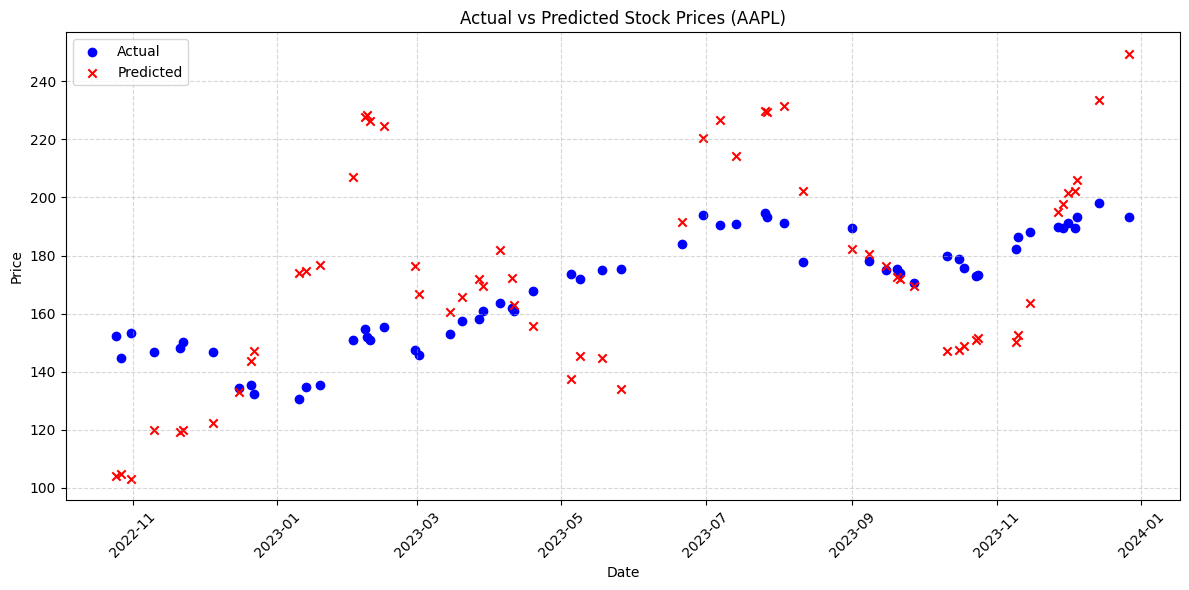

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].ffill()

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']
target = 'Close'
X = data[features]
y = data[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build MLP model with increased complexity
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model with Adam optimizer and MSE as the loss function
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Mean Squared Error on Test Set:", loss)

# Make predictions
predictions = model.predict(X_test_scaled)

# Plotting actual vs predicted with connected dots
plt.figure(figsize=(12, 6))
plt.scatter(data.loc[X_test.index, 'Date'], y_test.values, label='Actual', color='blue', marker='o')
plt.scatter(data.loc[X_test.index, 'Date'], predictions, label='Predicted', color='red', marker='x')
plt.title('Actual vs Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

